In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
resnet_acc_path = 'metrics/resnet/resnet_accuracy.csv'
resnet_loss_path = 'metrics/resnet/resnet_loss.csv'
vit_acc_path = 'metrics/vit/vit_accuracy.csv'
vit_loss_path = 'metrics/vit/vit_loss.csv'

In [17]:
rn_acc = pd.read_csv(resnet_acc_path)
print(rn_acc['message'])

0    Test set: Accuracy: 45%
1    Test set: Accuracy: 49%
2    Test set: Accuracy: 49%
3    Test set: Accuracy: 52%
4    Test set: Accuracy: 52%
5    Test set: Accuracy: 52%
6    Test set: Accuracy: 53%
7    Test set: Accuracy: 53%
8    Test set: Accuracy: 52%
9    Test set: Accuracy: 52%
Name: message, dtype: object


In [31]:
import re

extracted_resnet_acc = []

for msg in rn_acc['message']:
    m = re.search(r'[0-5][0-9]', msg)
    extracted_resnet_acc.append(float(m.group(0)))

In [32]:
extracted_resnet_acc

[45.0, 49.0, 49.0, 52.0, 52.0, 52.0, 53.0, 53.0, 52.0, 52.0]

In [19]:
vit_acc = pd.read_csv(vit_acc_path)
vit_acc['message']

0    {'eval_loss': 1.1384522914886475, 'eval_accura...
1    {'eval_loss': 1.0711150169372559, 'eval_accura...
2    {'eval_loss': 1.0690926313400269, 'eval_accura...
3    {'eval_loss': 1.0901082754135132, 'eval_accura...
4    {'eval_loss': 1.106437087059021, 'eval_accurac...
Name: message, dtype: object

In [39]:
extracted_vit_acc = []

for msg in vit_acc['message']:
    m = re.search(r'\'eval_accuracy\': \d*\.*\d+', msg)
    val = m.group(0).split()[1]
    extracted_vit_acc.append(float(val) * 100.0)

In [40]:
extracted_vit_acc

[47.22272727272727,
 51.64090909090909,
 52.38181818181818,
 52.527272727272724,
 52.45454545454545]

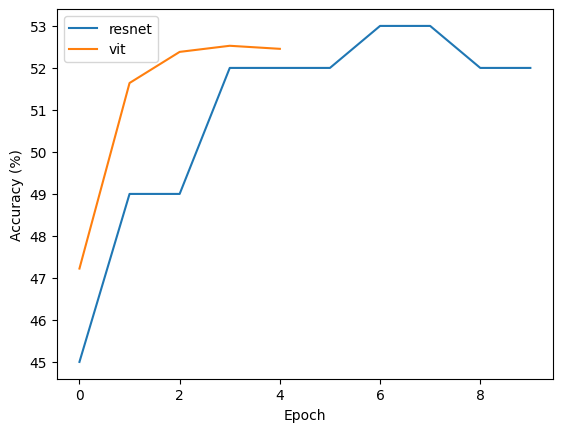

In [54]:
plt.plot(extracted_resnet_acc, label = "resnet")
plt.plot(extracted_vit_acc, label = "vit")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

In [42]:
rn_loss = pd.read_csv(resnet_loss_path)
print(rn_loss['message'])

0           Loss 0.011847656220197678, Accuracy 30.1875%
1         Loss 0.011116490699350834, Accuracy 33.328125%
2      Loss 0.010795599780976772, Accuracy 35.2708333...
3         Loss 0.010599986650049686, Accuracy 36.328125%
4             Loss 0.010442101396620274, Accuracy 37.55%
                             ...                        
165    Loss 0.006784777157008648, Accuracy 62.3197115...
166    Loss 0.006747853942215443, Accuracy 62.5825892...
167         Loss 0.006731694098562002, Accuracy 62.6375%
168    Loss 0.006716927979141474, Accuracy 62.7636363...
169    Loss 0.006716927979141474, Accuracy 62.7636363...
Name: message, Length: 170, dtype: object


In [44]:
extracted_resnet_loss = []

for msg in rn_loss['message']:
    m = re.search(r'Loss \d*\.*\d+', msg)
    val = m.group(0).split()[1]
    extracted_resnet_loss.append(float(val))

In [46]:
print(len(extracted_resnet_loss))

170


In [47]:
vit_loss = pd.read_csv(vit_loss_path)
vit_loss['message']

0     {'loss': 1.4854, 'learning_rate': 2e-05, 'epoc...
1     {'loss': 1.2837, 'learning_rate': 1.9331997327...
2     {'loss': 1.2267, 'learning_rate': 1.8663994655...
3     {'loss': 1.1862, 'learning_rate': 1.7995991983...
4     {'loss': 1.1594, 'learning_rate': 1.7327989311...
5     {'loss': 1.138, 'learning_rate': 1.66599866399...
6     {'loss': 1.0934, 'learning_rate': 1.5991983967...
7     {'loss': 1.0796, 'learning_rate': 1.5323981295...
8     {'loss': 1.0757, 'learning_rate': 1.4655978623...
9     {'loss': 1.066, 'learning_rate': 1.39879759519...
10    {'loss': 1.0606, 'learning_rate': 1.3319973279...
11    {'loss': 1.0537, 'learning_rate': 1.2651970607...
12    {'loss': 1.0054, 'learning_rate': 1.1983967935...
13    {'loss': 0.9867, 'learning_rate': 1.1315965263...
14    {'loss': 0.9839, 'learning_rate': 1.0647962591...
15    {'loss': 0.9788, 'learning_rate': 9.9799599198...
16    {'loss': 0.9742, 'learning_rate': 9.3119572478...
17    {'loss': 0.9712, 'learning_rate': 8.643954

In [48]:
extracted_vit_loss = []

for msg in vit_loss['message']:
    m = re.search(r'\'loss\': \d*\.*\d+', msg)
    val = m.group(0).split()[1]
    extracted_vit_loss.append(float(val))

In [50]:
print(len(extracted_vit_loss))

30


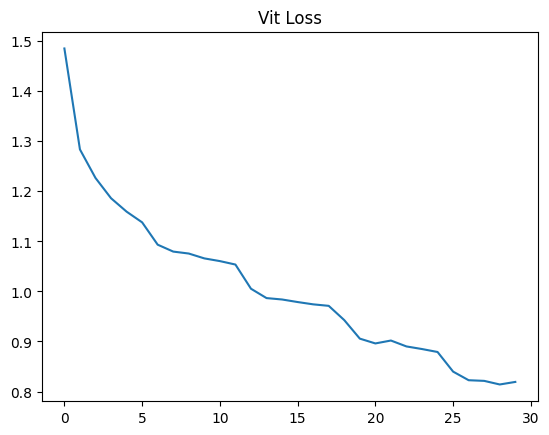

In [52]:
plt.plot(extracted_vit_loss, label = "vit")
plt.title('Vit Loss')
plt.show()

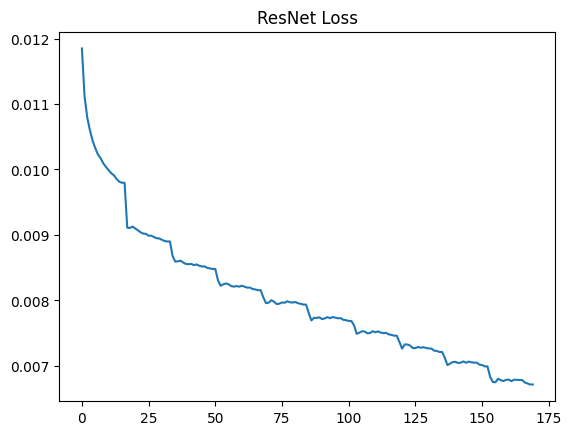

In [53]:
plt.plot(extracted_resnet_loss, label = "resnet")
plt.title('ResNet Loss')
plt.show()